# Eda 
- Patricio Villanueva Gio

<font color='blue'>Primero importamos las librerias necesarias</font>

In [2]:
import pandas as pd
import json

Leemos el archivo del tipo json y lo guardamos en data para posteriormente normalizarlo en un <font color='purple'>DF</font>

In [2]:
with open("../data/raw_data/tickets_classification_eng.json", "r") as f:
    data = json.load(f)

In [3]:
df = pd.json_normalize(data)
df

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


Hacemos seleccion de columnas del DataFrame 

In [4]:
df = df[["_source.complaint_what_happened","_source.product","_source.sub_product"]]

rename = {"_source.complaint_what_happened":"complaint_what_happened",
 "_source.product":"category",
 "_source.sub_product":"sub_product"}

df = df.rename(rename, axis=1)

In [5]:
df["ticket_classification"] = df["category"] + " + " + df["sub_product"]
df = df.drop(columns=["category","sub_product"],axis=1)
df["complaint_what_happened"] = df["complaint_what_happened"].replace("",pd.NA)

df

,complaint_what_happened,ticket_classification
0,<NA>,Debt collection + Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
3,<NA>,Mortgage + Conventional home mortgage
4,<NA>,Credit card or prepaid card + General-purpose ...
...,...,...
78308,<NA>,Checking or savings account + Checking account
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account
78311,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card + General-purpose ...


In [6]:
df.isnull().sum()

complaint_what_happened    57241
ticket_classification      10571
dtype: int64

No solo tiramos los nulos de `complaint_what_happened` tambien tiramos los de `ticket_classification` Ya que sin categoria __y__ no vamos a ser capaces de predecir nada

In [7]:
df = df.dropna()
df.isnull().sum()

complaint_what_happened    0
ticket_classification      0
dtype: int64

In [8]:
df

,complaint_what_happened,ticket_classification
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
78301,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
78303,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


In [9]:
len(df)

18963

In [10]:
df = df.reindex()
df

,complaint_what_happened,ticket_classification
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
78301,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
78303,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


In [11]:
df.to_csv("../data/preprocessed_data/preprocessed.csv",index=False)

## Clean Data

Empecemos por revisar el eje de las y

In [12]:
len(df.ticket_classification.unique())

78

wtffff tengo que clasificar 78 categorias???

In [13]:
df = pd.read_csv("../data/preprocessed_data/preprocessed.csv")
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


Vamos a remplazar las X en el texto

In [14]:
def removeX(text:str)-> str: 
    return text.replace("X","")

In [15]:
df["complaint_what_happened"] = df["complaint_what_happened"].apply(removeX)
df

,complaint_what_happened,ticket_classification
0,Good morning my name is and I appreciate it ...,Debt collection + Credit card debt
1,I upgraded my card in //2018 and was told by...,Credit card or prepaid card + General-purpose ...
2,"Chase Card was reported on //2019. However, fr...","Credit reporting, credit repair services, or o..."
3,"On //2018, while trying to book a ticket, ...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, // I called Chas, my Visa Cred...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with pay and did not unders...,Checking or savings account + Checking account


In [19]:
class_counts = df['ticket_classification'].value_counts()
valid_classes = class_counts[class_counts >= 400].index
df = df[df['ticket_classification'].isin(valid_classes)]
df

,complaint_what_happened,ticket_classification
0,Good morning my name is and I appreciate it ...,Debt collection + Credit card debt
1,I upgraded my card in //2018 and was told by...,Credit card or prepaid card + General-purpose ...
3,"On //2018, while trying to book a ticket, ...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
5,Can you please remove inquiry,"Credit reporting, credit repair services, or o..."
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, // I called Chas, my Visa Cred...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with pay and did not unders...,Checking or savings account + Checking account


In [20]:
# import pandas as pd
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

# # Normalizar texto
# def normalize_text(text):
#     return ' '.join(text.lower().strip().split())

# # Normalizar la columna
# df['normalized_ticket_classification'] = df['ticket_classification'].apply(normalize_text)

# # Crear un set de categorías únicas
# unique_classes = []

# for category in df['normalized_ticket_classification']:
#     # Verifica si existe una categoría similar en unique_classes
#     if not unique_classes or all(fuzz.ratio(category, unique) <= 85 for unique in unique_classes):
#         unique_classes.append(category)

# # Crear un mapeo para reemplazo
# def find_closest_match(category, unique_classes):
#     closest_match = process.extractOne(category, unique_classes, scorer=fuzz.ratio)
#     return closest_match[0] if closest_match[1] > 85 else category

# # Reemplazar categorías por su más cercana
# df['cleaned_ticket_classification'] = df['normalized_ticket_classification'].apply(
#     lambda x: find_closest_match(x, unique_classes)
# )

# # Ver el resultado
# df[['ticket_classification', 'cleaned_ticket_classification']]


In [21]:
len(df.ticket_classification.unique())

8

In [22]:
df.to_csv("../data/clean_data/cleaned.csv",index=False)

# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("../data/clean_data/cleaned.csv")

print(df['ticket_classification'].value_counts())


ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                           4918
Checking or savings account + Checking account                                                     3788
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    2011
Bank account or service + Checking account                                                         1242
Mortgage + Conventional home mortgage                                                               955
Mortgage + Conventional fixed mortgage                                                              785
Mortgage + FHA mortgage                                                                             496
Debt collection + Credit card debt                                                                  427
Money transfer, virtual currency, or money service + Domestic (US) money transfer                   344
Bank account or service + Other bank produ

count    17855.000000
mean      1356.427835
std       1474.193749
min         19.000000
25%        515.500000
50%        962.000000
75%       1697.000000
max      31111.000000
Name: text_length, dtype: float64


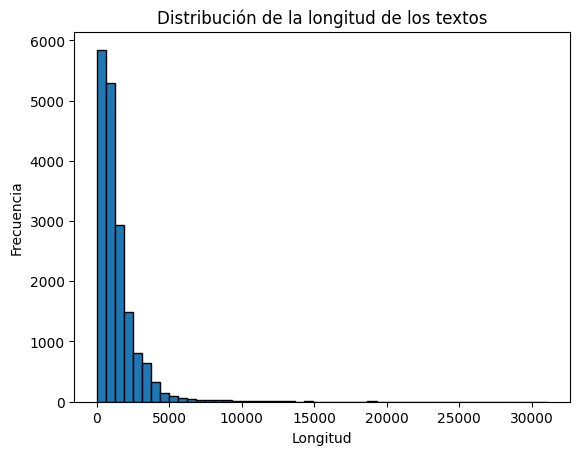

In [11]:
df['text_length'] = df['complaint_what_happened'].apply(len)

print(df['text_length'].describe())

plt.hist(df['text_length'], bins=50, edgecolor='black')
plt.title('Distribución de la longitud de los textos')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()


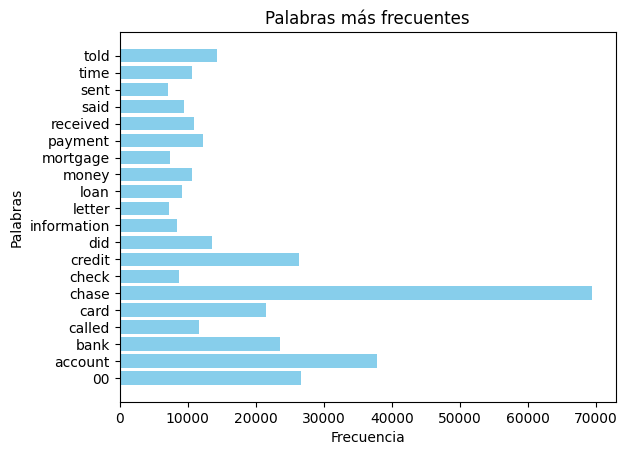

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_matrix = vectorizer.fit_transform(df['complaint_what_happened'])

common_words = vectorizer.get_feature_names_out()
common_counts = word_matrix.toarray().sum(axis=0)

plt.barh(common_words, common_counts, color='skyblue')
plt.title('Palabras más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()


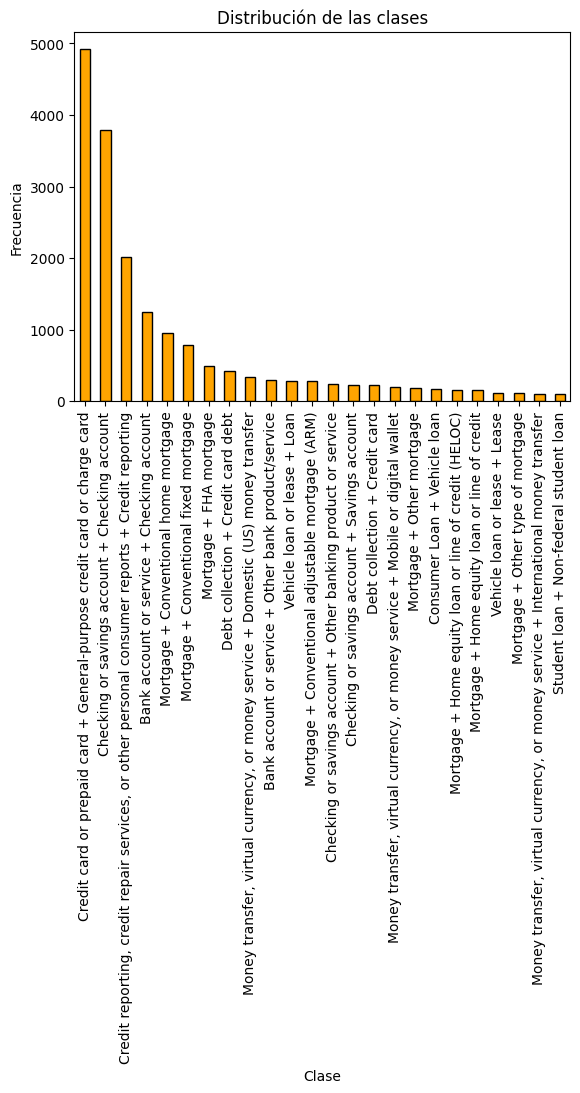

In [ ]:
df['ticket_classification'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribución')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


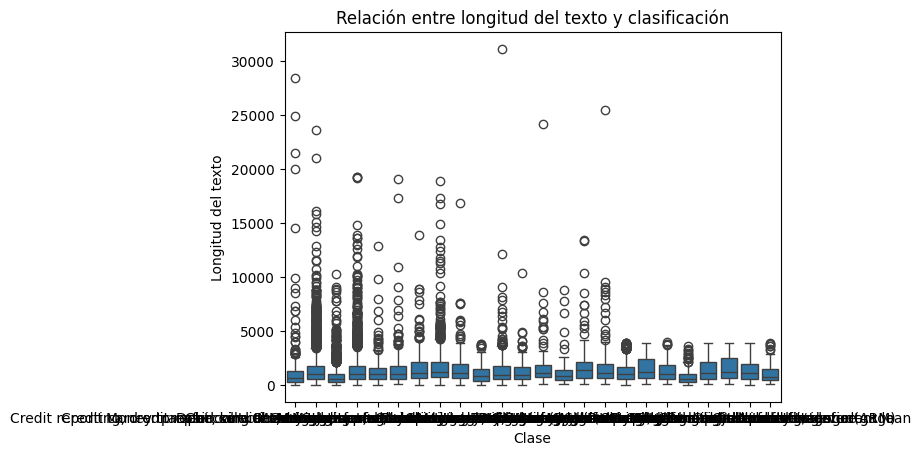

In [ ]:
sns.boxplot(x='ticket_classification', y='text_length', data=df)
plt.title('Relación entre len del texto y clasificación')
plt.xlabel('Clase')
plt.ylabel('len del texto')
plt.show()


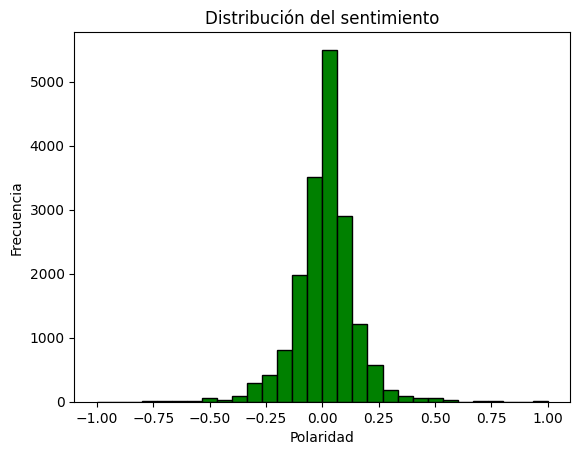

In [ ]:
from textblob import TextBlob

df['sentiment'] = df['complaint_what_happened'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.hist(df['sentiment'], bins=30, edgecolor='black', color='green')
plt.title('Distribución del sentimiento')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()
